# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1:
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [24]:
# Import necessary libraries
import pandas as pd
# for serializing and saving the extracted data
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the Document-Term Matrix (dtm.pkl)
# DTM is a matrix representation of text documents.
data_dtm = pd.read_pickle("/content/dtm.pkl")

# Load the cleaned data (data_clean.pkl)
# preprocessed data before creating the DTM
data_clean = pd.read_pickle("/content/data_clean.pkl")

# Load the CountVectorizer object (cv.pkl)
# converts the raw text data into a document-term matrix
cv = pickle.load(open("/content/cv.pkl", "rb"))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


#### Find  and print the top 30 words said by each comedian


In [17]:
# Find and print the top 30 words said by each comedian
for comedian in data_dtm.index:
    print(f"\nTop 30 words for {comedian}:")
    print(data_dtm.loc[comedian].sort_values(ascending=False).head(30))


Top 30 words for ali:
like        126
im           74
know         65
just         64
dont         61
shit         34
thats        34
youre        31
gonna        28
ok           26
lot          24
gotta        21
oh           21
wanna        21
husband      20
got          19
time         19
right        19
cause        18
women        17
day          17
people       16
pregnant     15
hes          14
need         14
god          14
yeah         13
tell         13
theyre       12
dude         12
Name: ali, dtype: int64

Top 30 words for anthony:
im         60
like       50
know       39
dont       38
got        34
joke       34
thats      31
said       31
anthony    27
day        26
say        26
just       26
guys       23
people     22
tell       19
youre      19
grandma    18
right      18
time       17
think      17
thing      17
school     16
jokes      16
yeah       16
did        16
good       16
okay       15
gonna      15
ive        15
baby       15
Name: anthony, dtype: int6

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [18]:
# Stop words list for ali
stop_words_ali = ['like', 'im', 'know', 'just', 'dont']

# Stop words list for anthony
stop_words_anthony = ['im', 'like', 'know', 'dont', 'got']

# Stop words list for bill
stop_words_bill = ['like', 'just', 'right', 'im', 'know']

# Stop words list for bo
stop_words_bo = ['know', 'like', 'think', 'love', 'im']

# Stop words list for dave
stop_words_dave = ['like', 'know', 'said', 'just', 'im']

# Stop words list for hasan
stop_words_hasan = ['like', 'im', 'know', 'dont', 'dad']

# Stop words list for jim
stop_words_jim = ['like', 'im', 'dont', 'right', 'fucking']

# Stop words list for joe
stop_words_joe = ['like', 'people', 'just', 'dont', 'im']

# Stop words list for john
stop_words_john = ['like', 'know', 'just', 'dont', 'said']

# Stop words list for louis
stop_words_louis = ['like', 'just', 'know', 'dont', 'thats']

# Stop words list for mike
stop_words_mike = ['like', 'im', 'know', 'said', 'just']

# Stop words list for ricky
stop_words_ricky = ['right', 'like', 'im', 'just', 'dont']

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [19]:
from collections import Counter

# Aggregate stop words lists
all_stop_words = (
    stop_words_ali +
    stop_words_anthony +
    stop_words_bill +
    stop_words_bo +
    stop_words_dave +
    stop_words_hasan +
    stop_words_jim +
    stop_words_joe +
    stop_words_john +
    stop_words_louis +
    stop_words_mike +
    stop_words_ricky
)

# Count occurrences of each word
word_counts = Counter(all_stop_words)

# Identify the most common words and their occurrences
most_common_words = word_counts.most_common()

# Print the results
print("Most common words and their occurrences:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

Most common words and their occurrences:
like: 12 occurrences
im: 10 occurrences
know: 9 occurrences
just: 8 occurrences
dont: 8 occurrences
right: 3 occurrences
said: 3 occurrences
got: 1 occurrences
think: 1 occurrences
love: 1 occurrences
dad: 1 occurrences
fucking: 1 occurrences
people: 1 occurrences
thats: 1 occurrences


#### If more than half of the comedians have it as a top word, exclude it from the list


In [20]:
# Identify comedians count
num_comedians = 12

# Exclude words that appear in more than half of the comedians' lists
filtered_words = {word: count for word, count in word_counts.items() if count >= num_comedians / 2}

# Print the filtered words
print("Filtered words based on more than half comedians having it as a top word:")
for word, count in filtered_words.items():
    print(f"{word}: {count} occurrences")

Filtered words based on more than half comedians having it as a top word:
like: 12 occurrences
im: 10 occurrences
know: 9 occurrences
just: 8 occurrences
dont: 8 occurrences


In [21]:
# Exclude filtered words from the all_stop_words list
all_stop_words = [word for word in all_stop_words if word not in filtered_words]

## Now put these stop words in Final_Stop_Words
final_stop_words = list(set(all_stop_words))

print(final_stop_words)

['right', 'got', 'think', 'said', 'love', 'dad', 'thats', 'people', 'fucking']


In [25]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Load the cleaned data (data_clean.pkl)
data_clean = pd.read_pickle("/content/data_clean.pkl")

# Add new stop words
cv = CountVectorizer(stop_words=final_stop_words + list(text.ENGLISH_STOP_WORDS))

# Recreate document-term matrix
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm_NLP3 = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm_NLP3.index = data_clean.index
data_dtm_NLP3


# Pickle it for later use
with open('data_dtm_NLP3.pkl', 'wb') as file:
    pickle.dump(data_dtm_NLP3, file)

In [26]:
data_dtm_NLP3

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [27]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
# !pip install wordcloud
from wordcloud import WordCloud

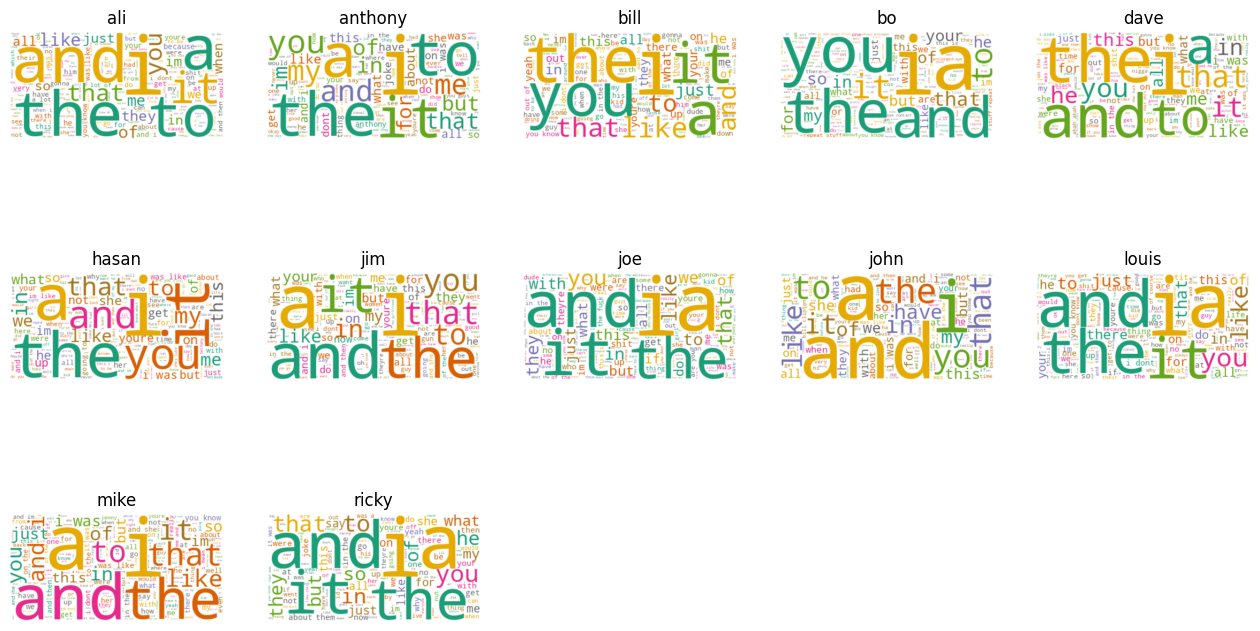

In [28]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 12]

# Create subplots for each comedian
comedians = data_dtm_NLP3.index
for index, comedian in enumerate(comedians):
    wc = WordCloud(stopwords=final_stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian)

plt.show()

### Assignment 2:
#### Find the number of unique words that each comedian uses.

To find unique comedians store I will data_dtm_nlp3 in a new dataframe then wherever there is numerical value I will change it to 1 and then to find which unique words are said by the  comedians that cell should be 1 and column sum should be 1 too

In [30]:
# Create a binary dataframe where each cell is 1 if the word is used by the comedian, 0 otherwise
binary_data_dtm_NLP3 = data_dtm_NLP3.applymap(lambda x: 1 if x > 0 else 0)

# Calculate the column sum for each word to check if it's unique to a comedian
unique_words_sum = binary_data_dtm_NLP3.sum(axis=0)

# Filter out words that are unique to a comedian (sum is 1)
unique_words_per_comedian = binary_data_dtm_NLP3.loc[:, unique_words_sum == 1]

# Calculate the row sum for each comedian to find the number of unique words
number_of_unique_words_per_comedian = unique_words_per_comedian.sum(axis=1)

# Create a new dataframe with the number of unique words per comedian
unique_words_count_df = pd.DataFrame({'Comedian': number_of_unique_words_per_comedian.index, 'UniqueWordsCount': number_of_unique_words_per_comedian.values})

# Print the dataframe with the number of unique words per comedian
print("Number of Unique Words Said by Each Comedian:")
print(unique_words_count_df)


Number of Unique Words Said by Each Comedian:
   Comedian  UniqueWordsCount
0       ali               424
1   anthony               182
2      bill               448
3        bo               385
4      dave               371
5     hasan               525
6       jim               316
7       joe               374
8      john               406
9     louis               250
10     mike               458
11    ricky               514


In [31]:
# Summing the values across each row to get the total words
total_words_by_comedian = data_dtm.sum(axis=1)

# Creating a new DataFrame df_nlp3
df_nlp3 = pd.DataFrame({'Comedian': total_words_by_comedian.index, 'Total_Words': total_words_by_comedian.values})

# Displaying the new DataFrame
print(df_nlp3)

   Comedian  Total_Words
0       ali         3283
1   anthony         2905
2      bill         5535
3        bo         3165
4      dave         4094
5     hasan         4777
6       jim         4764
7       joe         4579
8      john         4001
9     louis         3332
10     mike         4741
11    ricky         4972


In [32]:
import numpy as np
# List of comedians
comedians = df_nlp3['Comedian'].tolist()
# Generate random durations for each comedian
random_durations = np.random.choice([40, 41, 42, 43, 44, 45, 46, 47, 48, 49,38], size=len(comedians))
# Adding the 'Duration' column to the DataFrame
df_nlp3['run_times'] = random_durations
# Displaying the updated DataFrame
print(df_nlp3)

   Comedian  Total_Words  run_times
0       ali         3283         47
1   anthony         2905         45
2      bill         5535         49
3        bo         3165         48
4      dave         4094         40
5     hasan         4777         47
6       jim         4764         47
7       joe         4579         48
8      john         4001         44
9     louis         3332         44
10     mike         4741         40
11    ricky         4972         49


In [33]:
# Calculate the words per minute of each comedian
df_nlp3['words_per_minute'] = df_nlp3['Total_Words'] / df_nlp3['run_times']
df_nlp3

,Comedian,Total_Words,run_times,words_per_minute
0,ali,3283,47,69.851064
1,anthony,2905,45,64.555556
2,bill,5535,49,112.959184
3,bo,3165,48,65.937500
4,dave,4094,40,102.350000
5,hasan,4777,47,101.638298
6,jim,4764,47,101.361702
7,joe,4579,48,95.395833
8,john,4001,44,90.931818
9,louis,3332,44,75.727273


In [34]:
# Sorting the DataFrame by 'words_per_minute'
df_sorted = df_nlp3.sort_values(by='words_per_minute', ascending=False)
df_sorted

,Comedian,Total_Words,run_times,words_per_minute
10,mike,4741,40,118.525000
2,bill,5535,49,112.959184
4,dave,4094,40,102.350000
5,hasan,4777,47,101.638298
11,ricky,4972,49,101.469388
6,jim,4764,47,101.361702
7,joe,4579,48,95.395833
8,john,4001,44,90.931818
9,louis,3332,44,75.727273
0,ali,3283,47,69.851064


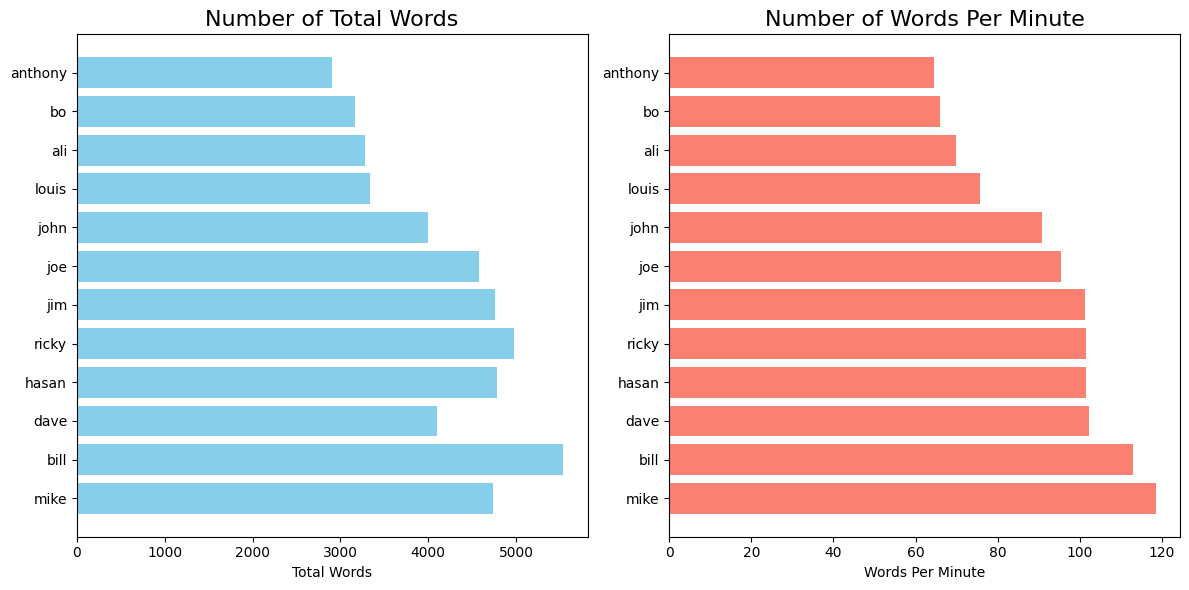

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Sorting the DataFrame by 'words_per_minute'
df_sorted = df_nlp3.sort_values(by='words_per_minute', ascending=False)

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the Number of Total Words
axes[0].barh(df_sorted['Comedian'], df_sorted['Total_Words'], color='skyblue')
axes[0].set_yticks(df_sorted['Comedian'])
axes[0].set_xlabel('Total Words')
axes[0].set_title('Number of Total Words', fontsize=16)

# Plotting the Number of Words Per Minute
axes[1].barh(df_sorted['Comedian'], df_sorted['words_per_minute'], color='salmon')
axes[1].set_yticks(df_sorted['Comedian'])
axes[1].set_xlabel('Words Per Minute')
axes[1].set_title('Number of Words Per Minute', fontsize=16)

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

#### Write your findings. For example:
* **Vocabulary**
   * Ricky (British comedy) and Bill(podcast host) use a lot of words in their comedy
   * Bo (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Mike (blue comedy) and Bill (podcast host) talk fast
   * Bo (musical comedy) and Anthony (dark humor) talk slow.

### Assignment 3:
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [36]:
# take a look at the most common words
lol = Counter(data_dtm)
most_common_words = [word for word, _ in lol.most_common()]
print(most_common_words)

['aaaaah', 'aaaaahhhhhhh', 'aaaaauuugghhhhhh', 'aaaahhhhh', 'aaah', 'aah', 'abc', 'abcs', 'ability', 'abject', 'able', 'ablebodied', 'abortion', 'abortions', 'abroad', 'absofuckinglutely', 'absolute', 'absolutely', 'absorb', 'absorbing', 'abstain', 'abuse', 'abused', 'academically', 'acc', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accident', 'accidentally', 'accomplished', 'accomplishments', 'according', 'accordingly', 'accoutrements', 'accurate', 'accustomed', 'accutane', 'achieve', 'achievement', 'acid', 'acknowledge', 'acknowledging', 'acoustic', 'acquisitions', 'acquitted', 'act', 'acting', 'actions', 'activate', 'active', 'activity', 'actor', 'actors', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'add', 'added', 'adding', 'address', 'adhere', 'adjectives', 'adjourned', 'adjustments', 'admired', 'admirers', 'admit', 'admittedly', 'adopt', 'adopting', 'adorable', 'adore', 'ads', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'a

In [37]:
# List of profanity words
profanity_words = ['fucking', 'fuck', 'shit', 'bitch', 'dicks', 'fucked', 'fuckin', 'fucks']

# Filter the DataFrame to include only the columns present in the list of profanity words
data_bad_words = data_dtm.loc[:, profanity_words]
data_bad_words


,fucking,fuck,shit,bitch,dicks,fucked,fuckin,fucks
ali,5,11,34,3,0,4,2,0
anthony,6,9,9,1,1,4,4,0
bill,70,36,63,2,0,4,11,1
bo,22,15,6,2,0,3,0,0
dave,32,33,45,4,3,7,0,0
hasan,8,16,15,0,0,4,0,0
jim,78,37,20,2,1,7,0,4
joe,69,66,40,10,0,2,1,4
john,2,2,6,1,0,0,0,0
louis,6,15,25,0,0,0,0,1


In [39]:
!pip install adjustText

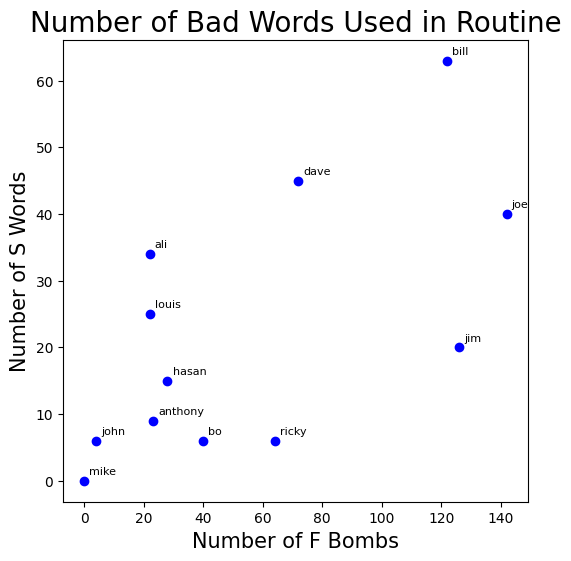

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Create a figure with subplots
plt.figure(figsize=(6, 6))

# Loop through each comedian
texts = []
for i, comedian in enumerate(data_bad_words.index):
    # Filter 'f_words' and 's_words' based on starting letter
    f_words = [word for word in profanity_words if word.startswith('f')]
    s_words = [word for word in profanity_words if word.startswith('s')]

    # Calculate the total count of 'f_words' and 's_words'
    x = data_bad_words[f_words].sum(axis=1).loc[comedian]
    y = data_bad_words[s_words].sum(axis=1).loc[comedian]

    # Create a scatter plot
    plt.scatter(x, y, color='blue')

    # Add text annotations to the list
    texts.append(plt.text(x + 1.5, y + 0.5, comedian, fontsize=8))

# Adjust text positions to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Set plot title and labels
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

# Show the plot
plt.show()

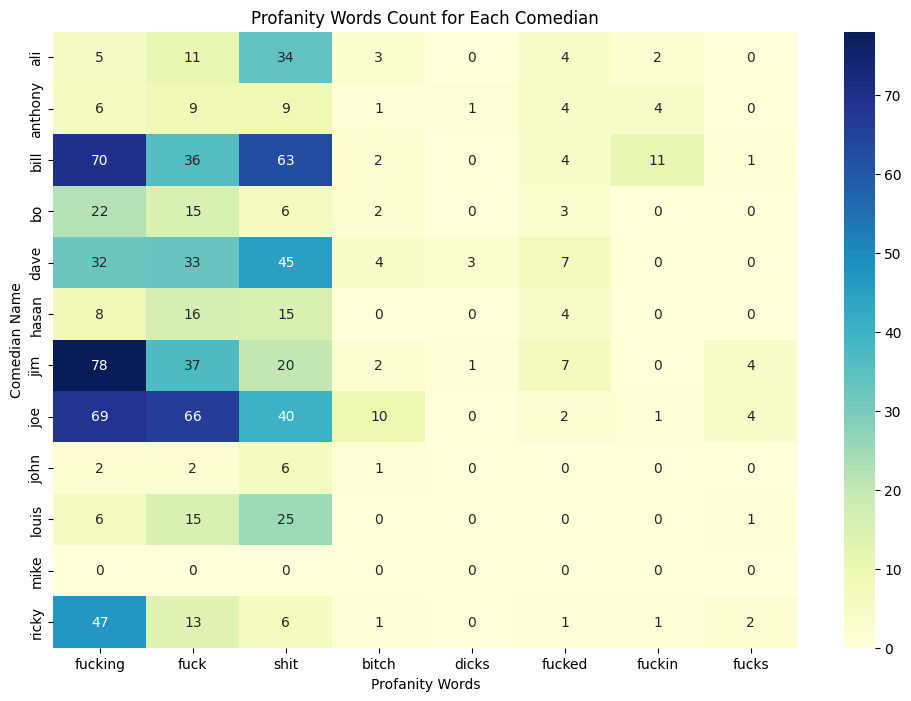

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_bad_words, annot=True, fmt="d", cmap="YlGnBu", xticklabels=profanity_words)
plt.title("Profanity Words Count for Each Comedian")
plt.xlabel("Profanity Words")
plt.ylabel("Comedian Name")
plt.show()

### Write your findings.
#### For example:
* **Averaging 2 F-Bombs Per Minute!** - Bill Bur, Joe Rogan and Jim Jefferies has used the most f-words.

* **Clean Humor** - Besides Ali Wong, my two other comedians in this group are John Mulaney and Mike Birbiglia that has clean Humor.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

Ans: Other than plot f-word and s-word we can compare d-word and b-word

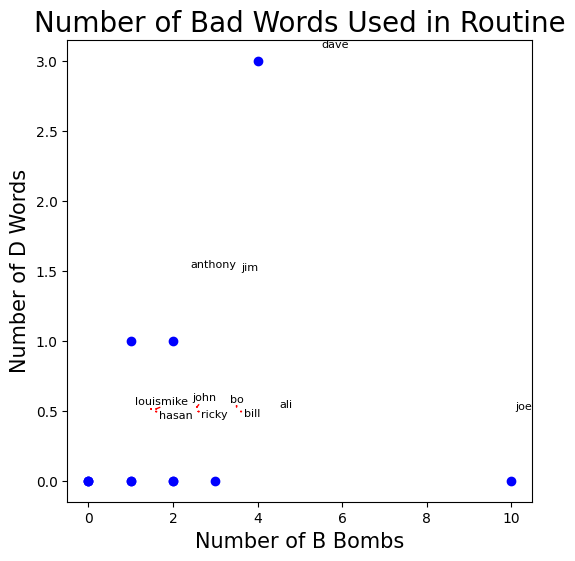

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Create a figure with subplots
plt.figure(figsize=(6, 6))

# Loop through each comedian
texts = []
for i, comedian in enumerate(data_bad_words.index):
    # Filter 'f_words' and 's_words' based on starting letter
    f_words = [word for word in profanity_words if word.startswith('b')]
    s_words = [word for word in profanity_words if word.startswith('d')]

    # Calculate the total count of 'f_words' and 's_words'
    x = data_bad_words[f_words].sum(axis=1).loc[comedian]
    y = data_bad_words[s_words].sum(axis=1).loc[comedian]

    # Create a scatter plot
    plt.scatter(x, y, color='blue')

    # Add text annotations to the list
    texts.append(plt.text(x + 1.5, y + 0.5, comedian, fontsize=8))

# Adjust text positions to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Set plot title and labels
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of B Bombs', fontsize=15)
plt.ylabel('Number of D Words', fontsize=15)

# Show the plot
plt.show()

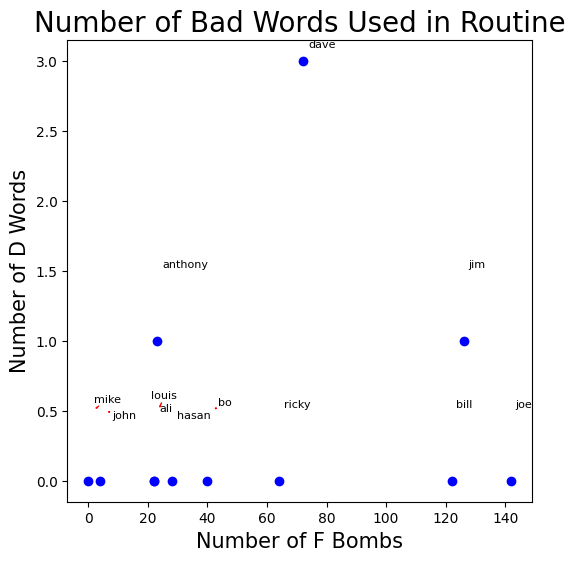

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Create a figure with subplots
plt.figure(figsize=(6, 6))

# Loop through each comedian
texts = []
for i, comedian in enumerate(data_bad_words.index):
    # Filter 'f_words' and 's_words' based on starting letter
    f_words = [word for word in profanity_words if word.startswith('f')]
    s_words = [word for word in profanity_words if word.startswith('d')]

    # Calculate the total count of 'f_words' and 's_words'
    x = data_bad_words[f_words].sum(axis=1).loc[comedian]
    y = data_bad_words[s_words].sum(axis=1).loc[comedian]

    # Create a scatter plot
    plt.scatter(x, y, color='blue')

    # Add text annotations to the list
    texts.append(plt.text(x + 1.5, y + 0.5, comedian, fontsize=8))

# Adjust text positions to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Set plot title and labels
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of D Words', fontsize=15)

# Show the plot
plt.show()

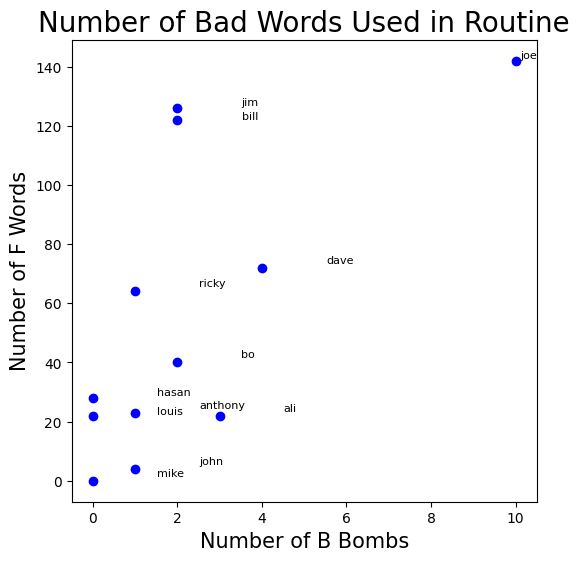

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Create a figure with subplots
plt.figure(figsize=(6, 6))

# Loop through each comedian
texts = []
for i, comedian in enumerate(data_bad_words.index):
    # Filter 'f_words' and 's_words' based on starting letter
    f_words = [word for word in profanity_words if word.startswith('b')]
    s_words = [word for word in profanity_words if word.startswith('f')]

    # Calculate the total count of 'f_words' and 's_words'
    x = data_bad_words[f_words].sum(axis=1).loc[comedian]
    y = data_bad_words[s_words].sum(axis=1).loc[comedian]

    # Create a scatter plot
    plt.scatter(x, y, color='blue')

    # Add text annotations to the list
    texts.append(plt.text(x + 1.5, y + 0.5, comedian, fontsize=8))

# Adjust text positions to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Set plot title and labels
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of B Bombs', fontsize=15)
plt.ylabel('Number of F Words', fontsize=15)

# Show the plot
plt.show()